<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Prebuilt Datasets and Transforms</h1> 


<h2>Table of Contents</h2>
<ul>
    <li><a href="#Prebuilt_Dataset">Prebuilt Datasets</a></li>
    <li><a href="#Torchvision">Torchvision Transforms</a></li>
</ul>
<hr>

<h2>Preparation</h2>


In [ ]:
!pip install torchvision==0.9.1 torch==1.8.1 
import torch 
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0) # for forcing the random function to give same number

In [2]:
# Function to display images

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap = 'gray')
    plt.title('y = ' + str(data_sample[1]))

<h2 id="Prebuilt_Dataset">Prebuilt Datasets</h2> 


In [3]:
# Run the command below when you do not have torchvision installed
# !mamba install -y torchvision

import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [ ]:
# Import the prebuilt dataset into variable ds

ds_a = dsets.MNIST(root = './data', download = True, transform = transforms.ToTensor())

Each element of the dataset object contains a tuple. Let us see whether the first element in the dataset is a tuple and what is in it.


In [10]:
# Examine whether the elements in dataset MNIST are tuples, and what is in the tuple?

print("Type of 1st element: ", type(ds_a[0]))
print("The length of the tuple: ", len(ds_a[0]))
print("The shape of 1st element in the tuple: ", ds_a[0][0].shape)
print("The type of 1st in the tuple", type(ds_a[0][0]))
print("The 2nd element in the tuple: ", ds_a[0][1])
print("The type of 2nd element in the tuple: ", type(ds_a[0][1]))
print("The structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(5)).")

Type of 1st element:  <class 'tuple'>
The length of the tuple:  2
The shape of 1st element in the tuple:  torch.Size([1, 28, 28])
The type of 1st in the tuple <class 'torch.Tensor'>
The 2nd element in the tuple:  5
The type of 2nd element in the tuple:  <class 'int'>
The structure of the first element in the dataset is (tensor([1, 28, 28]), tensor(5)).


- 1st element in the tuple is cuboid tensor. There is a dimension with only size 1, so basically, it is a rectangular tensor.<br>
- 2nd element in the tuple is number tensor, which indicate the real number image shows. As 2nd element in the tuple is <code>tensor(5)</code>, the image should show a hand-written 5.


Let us plot the first element in the dataset:


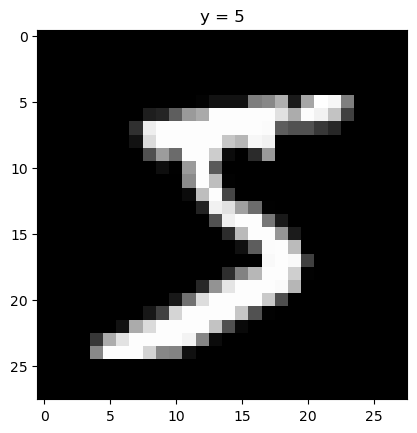

In [11]:
# Plot 1st element in the dataset
show_data(ds_a[0])

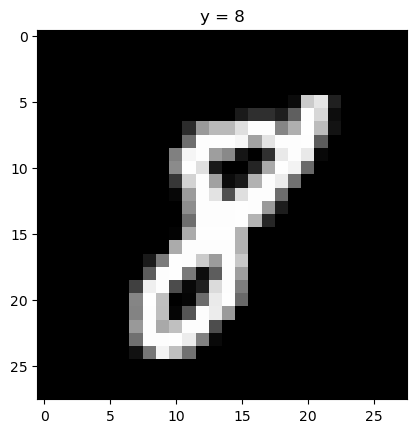

In [12]:
show_data(ds_a[17])

<h2 id="Torchvision"> Torchvision Transforms  </h2> 


In [14]:
# Combine two transforms: crop and convert to tensor.
croptensor_compose = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])

# Apply the compose to MNIST dataset
ds_b = dsets.MNIST(root = './data', download = False, 
                   transform = croptensor_compose)
print("The shape of 1st element in 1st tuple: ", ds_b[0][0].shape)

The shape of 1st element in 1st tuple:  torch.Size([1, 20, 20])


We can see the image is now 20 x 20 instead of 28 x 28.


<!--Empty Space for separating topics-->


Let us plot the first image again. Notice that the black space around the <b>5</b> become less apparent.

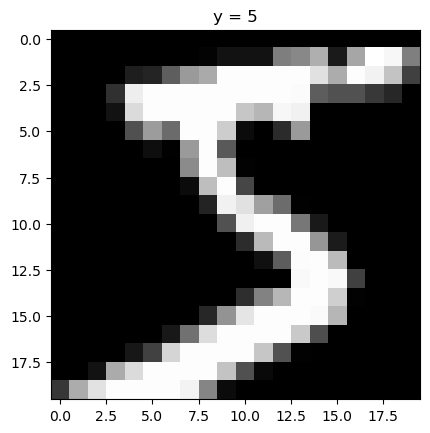

In [17]:
show_data(ds_b[0], shape = (20, 20))

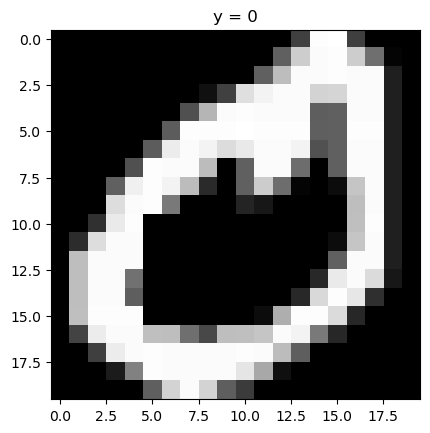

In [18]:
show_data(ds_b[21], shape = (20, 20))

In the below example, we horizontally flip the image, and then convert it to a tensor. Use <code>transforms.Compose()</code> to combine these two transform functions. Plot the flipped image.


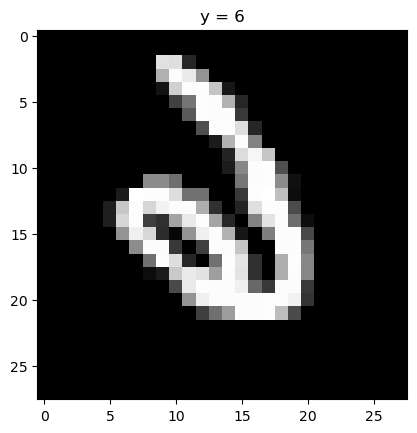

In [22]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_compose = transforms.Compose([transforms.RandomHorizontalFlip(p = 1),
                                                transforms.ToTensor()])
ds_c = dsets.MNIST(root = './data', download = False, transform = fliptensor_compose)
show_data(ds_c[13])

<h3>Practice</h3>


Try to use the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image (the image as <b>2</b>).


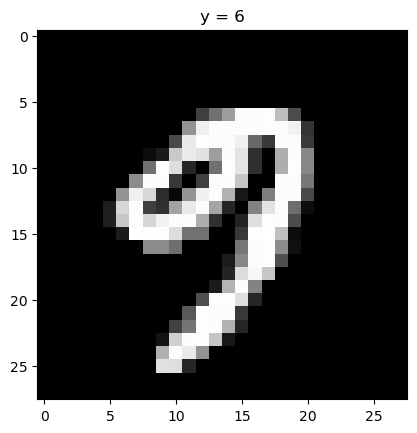

In [24]:
compose_practice = transforms.Compose([transforms.RandomVerticalFlip(p = 1), 
                                       transforms.RandomHorizontalFlip(p = 1), 
                                       transforms.ToTensor()])
ds_d = dsets.MNIST(root = './data', download = False, transform = compose_practice)
show_data(ds_d[13])